In [21]:
import pandas as pd 
import numpy as np
import yfinance as yf
import ta

import pyfolio as pf
import pypfopt # pip install PyPortfolioOpt



import wrds
import copy
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [3]:
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'BRK-B', 'NVDA', 'FB', 'UNH', 'V', 'JNJ', 'WMT', 'JPM', 'PG', 'MA']
start = '2012-07-01'
end = dt.datetime.today()

# Data Import

In [4]:
close_original = yf.download(tickers, start=start, end=end)['Adj Close']
volume_original = yf.download(tickers, start=start, end=end)['Volume']
high_original = yf.download(tickers, start=start, end=end)['High']
low_original = yf.download(tickers, start=start, end=end)['Low']

[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  15 of 15 completed


# Data Smoothing

In [5]:
close = close_original.ewm(alpha=0.2).mean()
volume = volume_original.ewm(alpha=0.2).mean()

# Direction forecasting
## Features
### On balance Volume

In [6]:
obv = pd.DataFrame()
for ticker in tickers:
    obv[ticker] = np.where(close[ticker] > close[ticker].shift(1),1,0) * volume[ticker]
    obv[ticker] = np.where(close[ticker] < close[ticker].shift(1),-1,obv[ticker]) * volume[ticker]
    obv[ticker] = obv[ticker].cumsum()

### Stochastic Oscillator %K

In [7]:
so = pd.DataFrame()
for ticker in tickers:
    so[ticker] = ta.momentum.StochasticOscillator(close = close_original[ticker], high = high_original[ticker], low = low_original[ticker]).stoch()

### Moving Average Convergence Divergence

In [8]:
macd = pd.DataFrame()
for ticker in tickers:
    macd[ticker] = ta.trend.MACD(close = close_original[ticker]).macd()

### Organize features into dictionary

In [9]:
features = {}
for ticker in tickers:
    features[ticker] = pd.DataFrame(obv[ticker],so[ticker],macd[ticker])

In [10]:
# Calculate log return
log_ret = np.log(close_original/close_original.shift(1))

# Calculate return
ret = close_original/close_original.shift(1) - 1

# Compare strategies
## Equally weighted portfolio

Start date,2012-07-02
End date,2022-04-08
Total months,117
,Backtest
Annual return,187.472%
Cumulative returns,2997466.312%
Annual volatility,130.642%
Sharpe ratio,1.55
Calmar ratio,1.89
Stability,0.92
Max drawdown,-99.385%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,99.38,2020-02-19,2020-03-23,2021-11-01,444
1,81.19,2018-10-01,2018-12-24,2019-10-25,280
2,73.30,2022-01-03,2022-03-08,NaT,NaN
3,70.04,2018-01-26,2018-04-02,2018-10-01,177
4,67.20,2015-07-20,2016-02-11,2016-04-01,185


Stress Events,mean,min,max
EZB IR Event,0.47%,-10.40%,12.13%
Apr14,-0.26%,-18.94%,8.31%
Oct14,1.44%,-13.99%,14.76%
Fall2015,-0.92%,-28.56%,31.79%
Recovery,0.39%,-12.71%,14.48%
New Normal,0.83%,-88.51%,73.81%


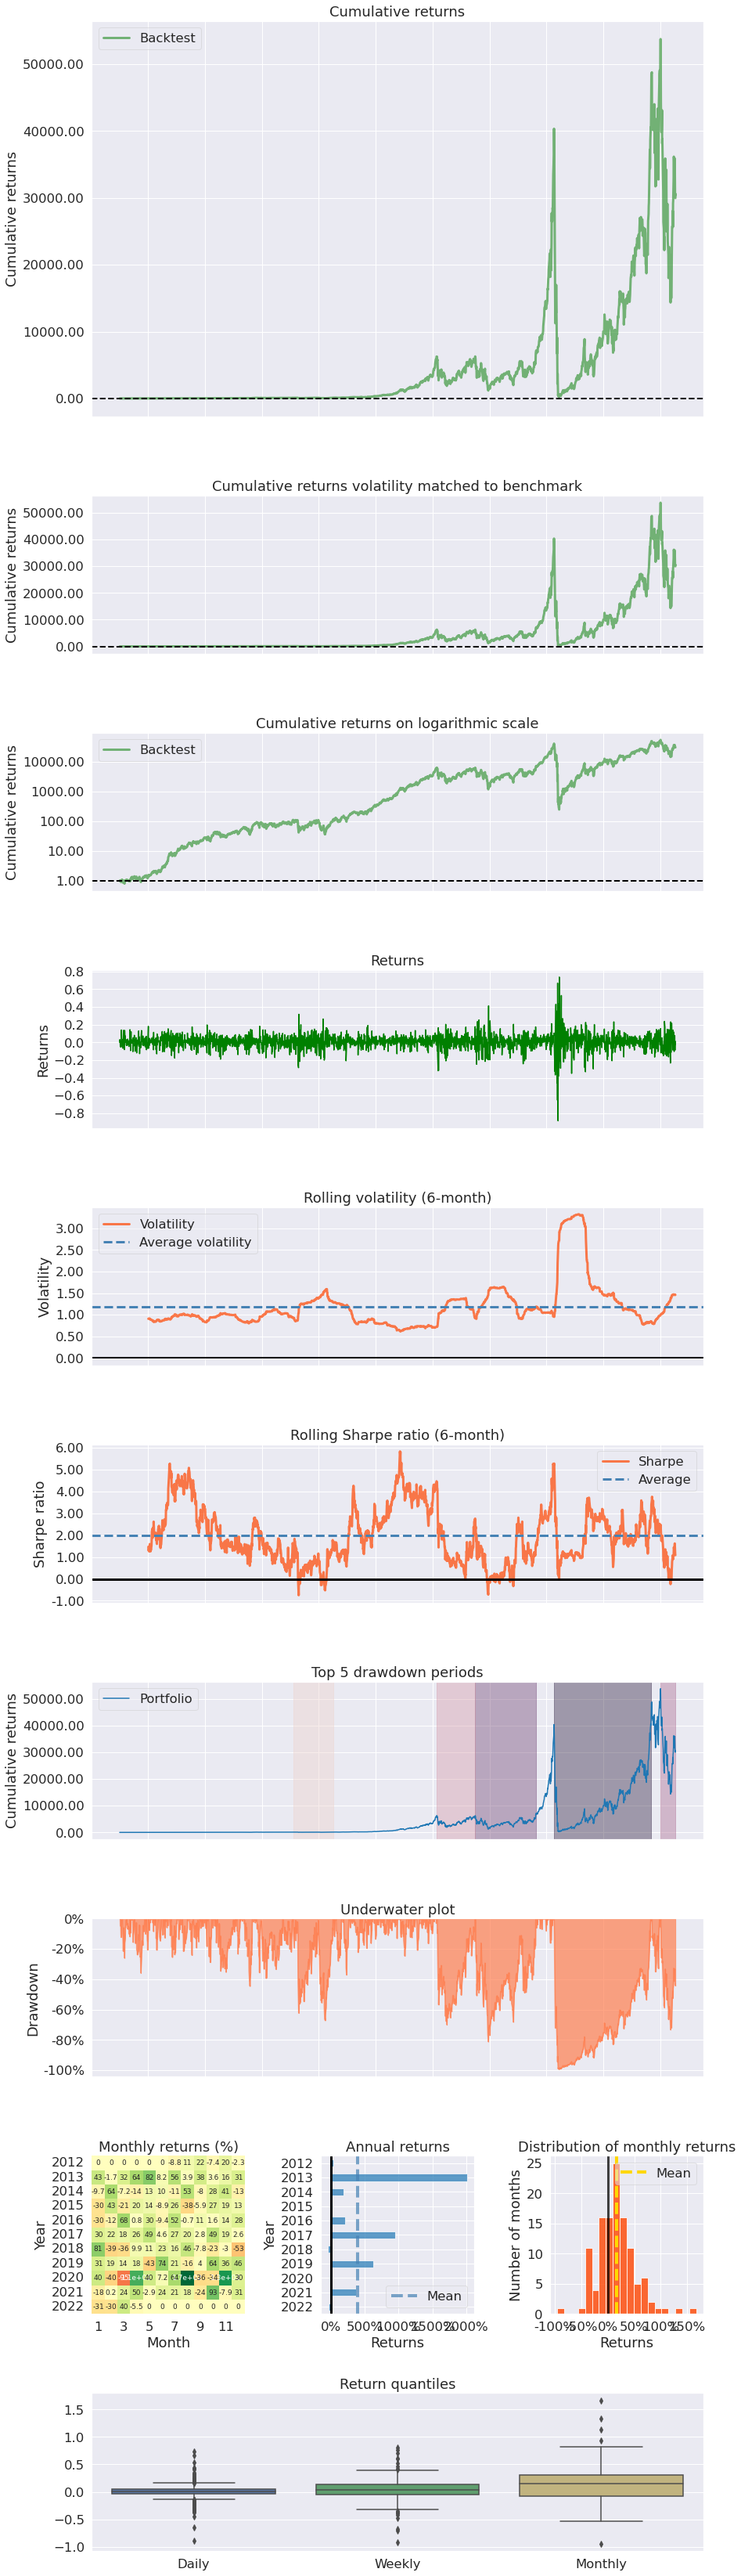

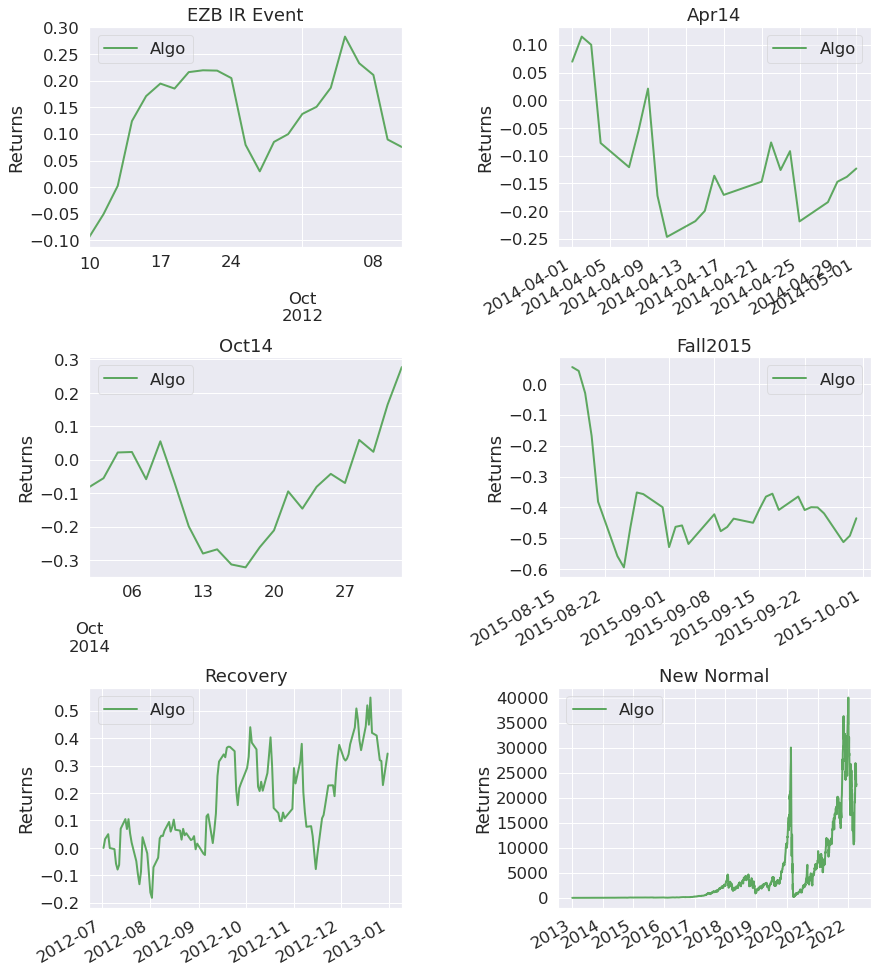

In [16]:
weight_equal = np.arange(start = 0.0, stop = 1.0, step = 1/len(tickers))
strat_equal = (ret * weight_equal).sum(axis=1)
pf.create_full_tear_sheet(strat_equal)

In [31]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Read in price data
df = yf.download(tickers=tickers[:3])



[*********************100%***********************]  3 of 3 completed


In [32]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
# ef.portfolio_performance(verbose=True)

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


ValueError: Workspace allocation error!